<a href="https://colab.research.google.com/github/cpng123/Machine-Learning/blob/main/Lectures/2%20K-Nearest%20Neighbours%20Classification/Lab%3A%20K-Nearest%20Neighbours%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Nearest Neighbours Classification

#### **Objective:**
In this lab, you will:
- Load and explore the Iris dataset.
- Implement the K-Nearest Neighbours (KNN) classification algorithm using `scikit-learn`.
- Train, tune, and evaluate the model using different values of \( k \).
- Visualize the model's performance with plots.
- Interpret the results of model evaluation.

### 1. **Loading Libraries and the Dataset**

#### **Instructions:**
We will start by importing the necessary libraries. `numpy` is for numerical operations, `pandas` for handling datasets, and `scikit-learn` provides the tools for building the KNN model.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt  # For plotting

### **What is K-Nearest Neighbours?**

#### **Explanation**:
**K-Nearest Neighbours (KNN)** is a simple, intuitive algorithm that classifies data points based on the majority label of their nearest neighbors. Here’s a simple real-world analogy:

Imagine you're at a fruit market and you want to know if a new fruit is an apple or an orange. You look at the fruits closest to it, and based on their types, you classify the new fruit. KNN does exactly this: it looks at nearby data points (neighbors) and classifies a new point based on what its neighbors are.

#### **Why is the \( k \) value important?**
- **\( k \) = Number of neighbors**: If \( k \) is too small (e.g., 1 or 2), the model becomes too sensitive to noise, as it only looks at the closest data points. If \( k \) is too large, the model will consider too many neighbors and may ignore important local patterns, resulting in a less specific prediction.

### 2. **Loading the Dataset**

#### **Instructions**:
Let’s load the **Iris dataset** and convert it into a `pandas` DataFrame to make it easier to explore.

In [5]:
# Step 2: Load the Iris dataset and convert to DataFrame

iris_data = load_iris()

# Convert to pandas DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target

# View the first few rows to ensure it's loaded correctly
### Insert Your Code Here ###  # Use df.head() to display the first rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### **Hint**:
Use `df.head()` to show the first five rows of the dataset.

### **Why Do We Standardize the Data?**

#### **Explanation**:
KNN calculates distances between data points. If the features (like sepal length and petal width) are on different scales, the model will give more importance to features with larger values. For instance, if one feature is measured in centimeters and another in meters, the model will prioritize the feature with larger numbers.

By **standardizing** the data (scaling it to have a mean of 0 and a standard deviation of 1), we ensure that all features are on the same scale, allowing the model to treat them equally.

### 3. **Exploring the Dataset**

#### **Instructions**:
Before building the model, we should explore the dataset to check its size and the distribution of the target classes (species).

In [7]:
# Step 3: Check the shape of the dataset and distribution of species

# Check the shape of the DataFrame (number of rows and columns)
### Insert Your Code Here ###
df.shape

# Check the distribution of species (target labels)
### Insert Your Code Here ###
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


#### **Hint**:
- Use `df.shape` to check the dataset's dimensions.
- Use `df['species'].value_counts()` to check the number of samples for each species.


### 4. **Splitting the Data**

#### **Explanation**:
To evaluate the performance of our KNN model, we need to split the data into three sets:
- **Training Set**: Used to train the model.
- **Validation Set**: Used to tune the model’s hyperparameters (like the value of \( k \)).
- **Test Set**: Used to evaluate the model's performance on unseen data.

#### **Why use a validation set?**
The validation set helps us fine-tune the model by selecting the best hyperparameters (e.g., choosing the optimal value of \( k \)). Once we've tuned the model using the validation set, we can evaluate it on the test set to see how well it generalizes to new data.

#### **Instructions**:
We will now split the data into **training**, **validation**, and **test sets**. First, we split 60% for training, and then divide the remaining 40% equally between validation and test sets.

In [12]:
# Step 4: Split the dataset into training, validation, and test sets

X = iris_data.data  # Features
y = iris_data.target  # Labels

# Split the data: 60% training, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check the sizes of the sets
### Insert Your Code Here ###
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Validation set size: {X_val.shape}, {y_val.shape}")
print(f"Test set size: {X_test.shape}, {y_test.shape}")

Training set size: (90, 4), (90,)
Validation set size: (30, 4), (30,)
Test set size: (30, 4), (30,)


#### **Hint**:
Use `train_test_split()` to split the data into training, validation, and test sets.

### 5. **Standardizing the Data**

#### **Instructions**:
Now we will **standardize** the features to ensure that all variables are on the same scale before applying the KNN algorithm.

In [16]:
# Step 5: Standardize the feature data using StandardScaler

scaler = StandardScaler()  # Initialize the StandardScaler

# Fit the scaler on the training data
### Insert Your Code Here ###
scaler.fit(X_train)

# Transform the training, validation, and test sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### **Hint**:
Use `scaler.fit()` to compute the mean and standard deviation on the training set and `scaler.transform()` to scale the datasets.

### 6. **Training the KNN Classifier**

#### **Instructions**:
We will now train the KNN classifier using \( k=5 \), meaning we will use the 5 nearest neighbors to classify each data point.

In [21]:
# Step 6: Train the KNN classifier with k=5

knn = KNeighborsClassifier(n_neighbors=5)  # Initialize the classifier

# Train the classifier on the scaled training data
### Insert Your Code Here ###  # Use knn.fit() to train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

#### **Hint**:
Use `knn.fit()` to train the model on the scaled training set.

### 7. **Evaluating on the Validation Set**

#### **Instructions**:
After training the model, we will evaluate its performance on the validation set by calculating the accuracy.

In [22]:
# Step 7: Make predictions on the validation set and calculate accuracy

# Make predictions
y_val_pred = knn.predict(X_val_scaled)

# Calculate the accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with k=5: {val_accuracy}")

Validation Accuracy with k=5: 0.9333333333333333


#### **Hint**:
Use `accuracy_score()` to calculate how accurate the model’s predictions are on the validation set.

### 8. **Tuning \( k \) Using Validation Accuracy**

#### **Explanation**:
The choice of \( k \) significantly impacts the performance of the KNN model. A small \( k \) may lead to overfitting (focusing too much on local noise), while a large \( k \) may cause underfitting (over-generalizing). We will now try different values of \( k \) to find the best one.

#### **Why use the validation set for tuning?**
The validation set helps us find the optimal \( k \) by testing different values and observing how the validation accuracy changes. Once we determine the best \( k \), we train the final model using the training set and evaluate it on the test set.

#### **Instructions**:
We will test values of \( k \) from 1 to 20 and find the one that gives the highest validation accuracy.

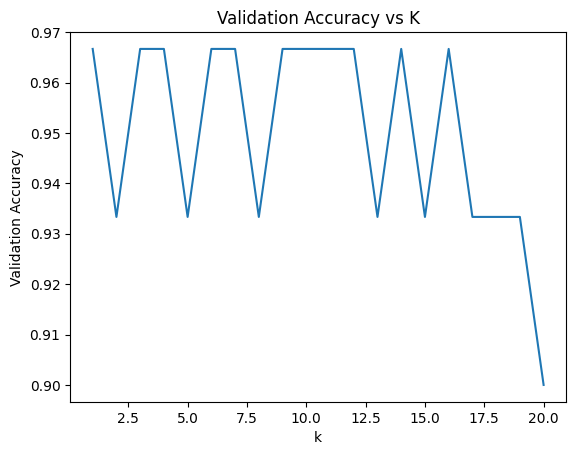

In [23]:
# Step 8: Tune k using validation accuracy

k_values = list(range(1, 21))  # Test k values from 1 to 20
val_accuracies = []

# Loop through k values and evaluate the accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_val_pred = knn.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

# Plot validation accuracy vs k values
plt.plot(k_values, val_accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs K')
plt.show()

#### **Hint**:
Use a loop to train and evaluate the model for different \( k \) values.

### 9. **Final Evaluation on the Test Set**

#### **Instructions**:
After selecting the best \( k \), we will re-train the model using the training set and evaluate it on the test set.

In [24]:
# Step 9: Train the final model with the best k value

optimal_k = 5  # Replace this with the best k
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the model on the training data and evaluate on the test set
knn.fit(X_train_scaled, y_train)
y_test_pred = knn.predict(X_test_scaled)

# Calculate the test accuracy and print classification report
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with k={optimal_k}: {test_accuracy}")

# Print the classification report
print(classification_report(y_test, y_test_pred, target_names=iris_data.target_names))


Test Accuracy with k=5: 0.9
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



#### **Hint**:
Use `classification_report()` from `sklearn.metrics` to evaluate precision, recall, and F1-score for each class.

### 10. **Visualizing the Decision Boundary**

#### **Instructions**:
To better understand how the KNN model is classifying data, we will visualize the **decision boundary**. This will show us how the model separates the different classes.

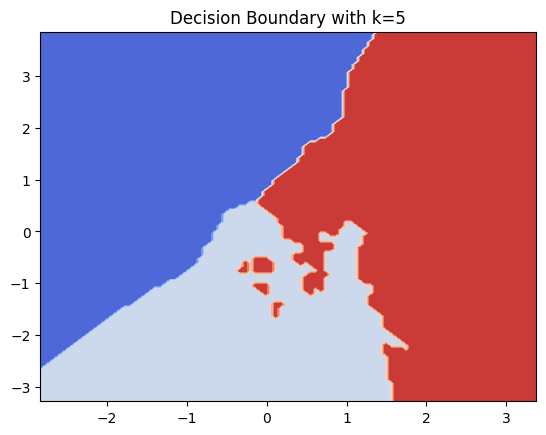

In [25]:
# Step 10: Visualize the decision boundary using the first two features

from sklearn.inspection import DecisionBoundaryDisplay

# Use only the first two features of the dataset
X_train_2d = X_train_scaled[:, :2]
knn_2d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_2d.fit(X_train_2d, y_train)

# Plot the decision boundary
DecisionBoundaryDisplay.from_estimator(knn_2d, X_train_2d, response_method='predict', cmap='coolwarm')
plt.title(f"Decision Boundary with k={optimal_k}")
plt.show()

#### **Explanation**:
- **Decision Boundary**: This plot shows how the KNN model divides the space based on class. Points in one region belong to one class, and points in another region belong to a different class. Notice how the boundaries become smoother or more complex as \( k \) changes:
    - **Small \( k \)**: Complex boundaries that may overfit.
    - **Large \( k \)**: Smoother boundaries that may underfit.

### **What to Do If Results Are Not Good?**

#### **Explanation**:
Sometimes the model might not perform well. Here are some steps you can take to improve the performance:
- **Low Accuracy**: Try adjusting \( k \), checking if features need further preprocessing, or experimenting with other algorithms.
- **Low Precision/Recall**: Consider rebalancing the dataset, adjusting the model’s hyperparameters, or trying a different classifier (e.g., Decision Trees or Logistic Regression).

### **Common Pitfalls**

- **Not Standardizing Data**: KNN relies on distance, so always make sure your data is standardized. Forgetting this step can lead to poor results.
- **Choosing \( k \) too small or large**: Small \( k \) values may overfit, while large \( k \) values might underfit. Always test multiple \( k \) values using validation data.

### **Optional Challenges**

- Try using a different dataset (e.g., the Wine or Breast Cancer dataset from `scikit-learn`).
- Experiment with adding/removing features to see how it affects accuracy.
- Use a different classifier, such as Logistic Regression, and compare its performance to KNN.

### **Summary:**

In this lab, you:
- Loaded and explored the Iris dataset.
- Trained and evaluated a K-Nearest Neighbours classifier.
- Tuned the hyperparameter \( k \) and visualized decision boundaries.
- Evaluated the model on the test set using accuracy and classification metrics.
- Explored common pitfalls, what to do if the results aren't good, and optional challenges for deeper exploration.
